In [7]:
import pandapower as pp
import pandapower.networks as pn
from pandapower.plotting import simple_plot

In [8]:
net_test = pn.case6ww()

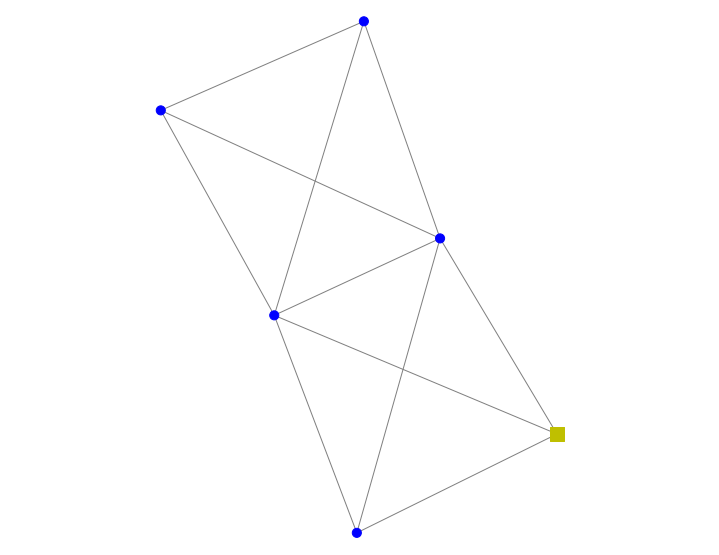

<AxesSubplot:>

In [9]:
simple_plot(net_test)

In [10]:
net_test

This pandapower network includes the following parameter tables:
   - bus (6 elements)
   - load (3 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (11 elements)
   - poly_cost (3 elements)
   - bus_geodata (6 elements)

In [11]:
net_test.ext_grid

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,0,True,None,0.0,1.05,200.0,50.0,100.0,-100.0


In [12]:
net_test.poly_cost

,element,et,cp0_eur,cp1_eur_per_mw,cp2_eur_per_mw2,cq0_eur,cq1_eur_per_mvar,cq2_eur_per_mvar2
0,0.0,ext_grid,213.1,11.669,0.00533,0.0,0.0,0.0
1,0.0,gen,200.0,10.333,0.00889,0.0,0.0,0.0
2,1.0,gen,240.0,10.833,0.00741,0.0,0.0,0.0


In [13]:
pp.runpp(net_test)

In [14]:
pp.runopp(net_test, verbose=True, suppress_warnings=False)

PYPOWER Version 5.1.4, 27-June-2018 -- AC Optimal Power Flow
Python Interior Point Solver - PIPS, Version 1.0, 07-Feb-2011
Converged!

Converged in 0.62 seconds
| PyPower (ppci) System Summary - these are not valid for pandapower DataFrames|

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses              6     Total Gen Capacity     530.0        -300.0 to 300.0
Generators         3     On-line Capacity       530.0        -300.0 to 300.0
Committed Gens     3     Generation (actual)    216.8             176.5
Loads              3     Load                   210.0             210.0
  Fixed            3       Fixed                210.0             210.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             0     Shunt (inj)              0.0               0.0
Branches          11     Losses (I^2 * Z)         6.75             20.64
Transformers    

/home/ivanightingale/anaconda3/envs/power/lib/python3.9/site-packages/pandapower/pypower/pipsopf_solver.py:167: ComplexWarning: Casting complex values to real discards the imaginary part
  Sf = V[ branch[:, F_BUS].astype(int) ] * conj(Yf * V)  ## cplx pwr at "from" bus, p["u"].
/home/ivanightingale/anaconda3/envs/power/lib/python3.9/site-packages/pandapower/pypower/pipsopf_solver.py:168: ComplexWarning: Casting complex values to real discards the imaginary part
  St = V[ branch[:, T_BUS].astype(int) ] * conj(Yt * V)  ## cplx pwr at "to" bus, p["u"].
/home/ivanightingale/anaconda3/envs/power/lib/python3.9/site-packages/pandapower/pypower/pipsopf_solver.py:179: ComplexWarning: Casting complex values to real discards the imaginary part
  muSf[il] = \
/home/ivanightingale/anaconda3/envs/power/lib/python3.9/site-packages/pandapower/pypower/pipsopf_solver.py:181: ComplexWarning: Casting complex values to real discards the imaginary part
  muSt[il] = \


In [15]:
net_test.res_cost

3134.3495346964937